Reading the Measurements from

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

In [48]:
# Load your river measurements at st. louis file
df_louis = pd.read_csv('field-measurements.csv')

# specific command to handle the 'x,y,monitor' format seen in your image
# If you get encoding errors, try adding: encoding='utf-8' or encoding='latin1'
print("Data Loaded Successfully!")
print(df_louis.columns)

Data Loaded Successfully!
Index(['x', 'y', 'monitoring_location_id', 'field_visit_id',
       'observing_procedure', 'unit_of_measure', 'qualifier',
       'approval_status', 'last_modified', 'observing_procedure_code',
       'parameter_code', 'value', 'time', 'vertical_datum',
       'measuring_agency'],
      dtype='object')


In [3]:
# Display the first 5 rows
display(df_louis.head())

# Check data types and look for null values
print("\n--- Data Info ---")
df_louis.info()

# Get basic statistics (mean, min, max) for your numeric columns (x, y)
display(df_louis.describe())

,x,y,monitoring_location_id,field_visit_id,observing_procedure,unit_of_measure,qualifier,approval_status,last_modified,observing_procedure_code,parameter_code,value,time,vertical_datum,measuring_agency
0,-90.179778,38.629,USGS-07010000,490f5c2a-d7f0-b6ab-e053-0100007ff985,NaN,ft,NaN,Approved,2025-06-22 02:26:59.278458+00:00,Z,65,0.23,1934-02-12 06:00:00+00:00,NaN,USGS
1,-90.179778,38.629,USGS-07010000,490f98ec-a89c-cccd-e053-0100007fa302,NaN,ft,NaN,Approved,2025-06-22 02:26:59.278458+00:00,Z,65,7.37,1950-02-27 06:00:00+00:00,NaN,USGS
2,-90.179778,38.629,USGS-07010000,491187e9-8f85-9323-e053-0100007f388c,NaN,ft,NaN,Approved,2025-06-22 02:26:59.278458+00:00,Z,65,39.64,2015-12-29 18:49:23+00:00,NaN,USGS
3,-90.179778,38.629,USGS-07010000,4910f50d-97cb-5b89-e053-0100007f9648,NaN,ft,NaN,Approved,2025-06-22 02:26:59.278458+00:00,Z,65,45.84,1993-07-28 15:00:00+00:00,NaN,USGS
4,-90.179778,38.629,USGS-07010000,490fc3cc-4270-ded1-e053-0100007f34dd,NaN,ft,NaN,Approved,2025-06-22 02:26:59.278458+00:00,Z,65,3.67,1954-09-08 06:00:00+00:00,NaN,USGS



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         3608 non-null   float64
 1   y                         3608 non-null   float64
 2   monitoring_location_id    3608 non-null   object 
 3   field_visit_id            3608 non-null   object 
 4   observing_procedure       0 non-null      float64
 5   unit_of_measure           3608 non-null   object 
 6   qualifier                 0 non-null      float64
 7   approval_status           3608 non-null   object 
 8   last_modified             3608 non-null   object 
 9   observing_procedure_code  3608 non-null   object 
 10  parameter_code            3608 non-null   int64  
 11  value                     3608 non-null   float64
 12  time                      3608 non-null   object 
 13  vertical_datum            0 non-null      fl

,x,y,observing_procedure,qualifier,parameter_code,value,vertical_datum
count,3.608000e+03,3.608000e+03,0.0,0.0,3608.0,3608.000000,0.0
mean,-9.017978e+01,3.862900e+01,NaN,NaN,65.0,12.251599,NaN
std,1.421282e-14,7.106412e-15,NaN,NaN,0.0,11.004801,NaN
min,-9.017978e+01,3.862900e+01,NaN,NaN,65.0,-5.960000,NaN
25%,-9.017978e+01,3.862900e+01,NaN,NaN,65.0,3.670000,NaN
50%,-9.017978e+01,3.862900e+01,NaN,NaN,65.0,10.090000,NaN
75%,-9.017978e+01,3.862900e+01,NaN,NaN,65.0,18.477500,NaN
max,-9.017978e+01,3.862900e+01,NaN,NaN,65.0,49.070000,NaN


In [4]:
# 1. Convert 'time' column to datetime objects
# errors='coerce' turns messy dates into NaT (Not a Time) so they don't crash the script
df_louis['time'] = pd.to_datetime(df_louis['time'], errors='coerce')

# 2. Convert 'value' to numeric (just in case it was read as text)
df_louis['value'] = pd.to_numeric(df_louis['value'], errors='coerce')

# 3. Sort by time to ensure lines connect in the right order
df_louis = df_louis.sort_values('time')

# 4. Filter out any rows where the time conversion failed
df_louis = df_louis.dropna(subset=['time', 'value'])

print(f"Data ready. Date range: {df_louis['time'].min()} to {df_louis['time'].max()}")

Data ready. Date range: 1933-03-16 06:00:00+00:00 to 2025-09-08 17:13:09+00:00


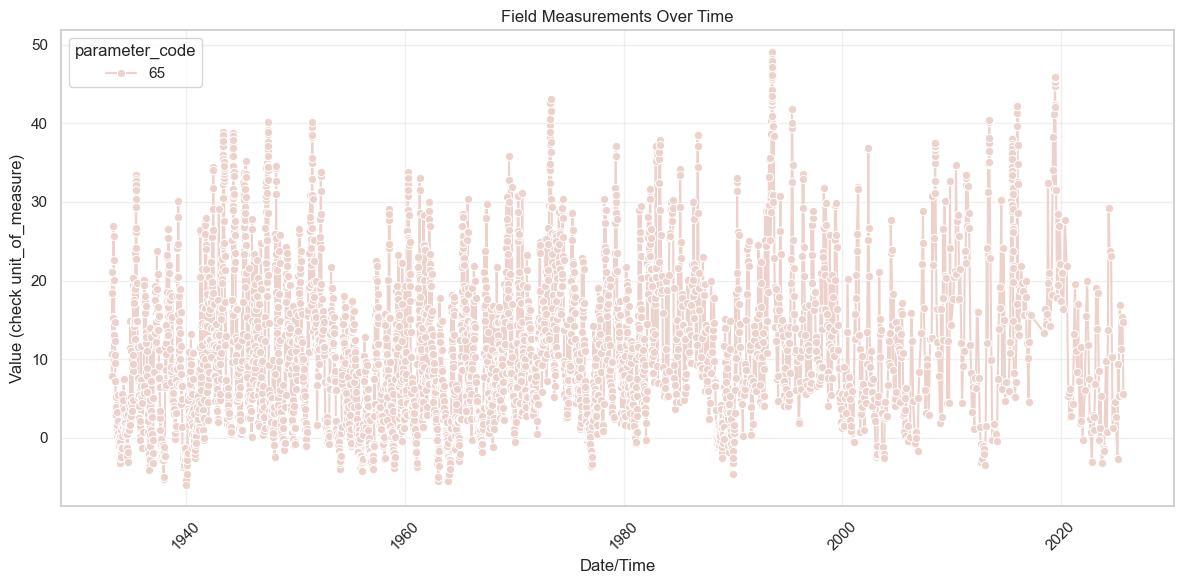

In [5]:
plt.figure(figsize=(12, 6))

# We use a lineplot with markers so you can see individual field visits
sns.lineplot(
    data=df_louis,
    x='time',
    y='value',
    hue='parameter_code', # Colors lines differently if you have mixed data types
    marker='o',           # Adds dots to show specific measurements
    linestyle='-'
)

plt.title('Field Measurements Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Value (check unit_of_measure)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import requests

# --- STEP 1: CLEAN DATE RANGE ---
df_clean = df_louis[df_louis['time'].dt.year >= 1940].copy()

if not df_clean.empty:
    lat = df_clean['y'].mean()
    lon = df_clean['x'].mean()
    start_date = df_clean['time'].min().strftime('%Y-%m-%d')
    end_date = df_clean['time'].max().strftime('%Y-%m-%d')
    print(f"Requesting comprehensive data for: {start_date} to {end_date}")

# --- STEP 2: FETCH EVERYTHING RELEVANT ---
def get_max_weather_data(latitude, longitude, start, end):
    url = "https://archive-api.open-meteo.com/v1/archive"

    # We request specific variables covering:
    # 1. Precip types (Rain vs Snow)
    # 2. Water Loss (Evapotranspiration)
    # 3. Ground State (Shallow vs Deep Soil, Frozen Ground)
    # 4. Atmospheric Energy (Pressure, Wind)

    variables = [
        "precipitation",
        "rain",
        "snowfall",
        "snow_depth",
        "temperature_2m",
        "relative_humidity_2m",
        "et0_fao_evapotranspiration",  # CRITICAL: Water loss to heat
        "soil_moisture_0_to_7cm",      # Surface saturation
        "soil_moisture_7_to_28cm",     # Root zone
        "soil_moisture_28_to_100cm",   # Deep storage (Baseflow)
        "soil_temperature_0_to_7cm",   # Frozen ground check
        "surface_pressure",            # Storm surge / Low pressure systems
        "wind_speed_10m"               # Wind setup on large rivers
    ]

    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start,
        "end_date": end,
        "hourly": ",".join(variables),
        "timezone": "auto"
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()

        # Load directly into DataFrame
        # Open-Meteo returns a dictionary where keys match variable names
        weather_df = pd.DataFrame(data['hourly'])

        # Convert time string to datetime objects
        weather_df['time'] = pd.to_datetime(weather_df['time'])

        # Rename 'time' to 'datetime' to match your previous code
        weather_df = weather_df.rename(columns={'time': 'datetime'})

        return weather_df

    except requests.exceptions.HTTPError as err:
        print(f"API Error: {err}")
        return None

# Fetch the data
if not df_clean.empty:
    weather_df = get_max_weather_data(lat, lon, start_date, end_date)

    if weather_df is not None:
        print(f"Success! Downloaded {weather_df.shape[1]} variables for {len(weather_df)} hours.")
        display(weather_df.head())

Requesting comprehensive data for: 1940-01-08 to 2025-09-08
Success! Downloaded 14 variables for 750984 hours.


,datetime,precipitation,rain,snowfall,snow_depth,temperature_2m,relative_humidity_2m,et0_fao_evapotranspiration,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_temperature_0_to_7cm,surface_pressure,wind_speed_10m
0,1940-01-08 00:00:00,0.0,0.0,0.0,NaN,-6.8,87,0.0,0.293,0.292,0.273,1.7,1005.6,14.4
1,1940-01-08 01:00:00,0.0,0.0,0.0,NaN,-6.8,88,0.0,0.293,0.292,0.273,1.7,1006.3,15.5
2,1940-01-08 02:00:00,0.0,0.0,0.0,NaN,-6.6,87,0.0,0.293,0.292,0.273,1.7,1006.9,15.8
3,1940-01-08 03:00:00,0.0,0.0,0.0,NaN,-6.6,88,0.0,0.293,0.292,0.273,1.7,1007.3,15.9
4,1940-01-08 04:00:00,0.0,0.0,0.0,NaN,-5.6,90,0.0,0.293,0.292,0.273,1.7,1007.9,14.3


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set_theme(style="whitegrid")

# Basic Statistics
# We use .T to transpose because you have many columns
desc = weather_df.describe().T
display(desc[['mean', 'min', '50%', 'max', 'std']])

,mean,min,50%,max,std
datetime,1982-11-08 11:30:00,1940-01-08 00:00:00,1982-11-08 11:30:00,2025-09-08 23:00:00,NaN
precipitation,0.116892,0.0,0.0,34.2,0.554928
rain,0.110643,0.0,0.0,34.2,0.549597
snowfall,0.004481,0.0,0.0,3.64,0.053881
snow_depth,0.006503,0.0,0.0,0.48,0.027746
temperature_2m,13.611703,-31.9,14.7,45.1,11.183532
relative_humidity_2m,66.691129,12.0,67.0,100.0,18.360737
et0_fao_evapotranspiration,0.130094,0.0,0.05,0.96,0.170889
soil_moisture_0_to_7cm,0.316494,0.09,0.339,0.442,0.075947
soil_moisture_7_to_28cm,0.319609,0.144,0.339,0.441,0.069703


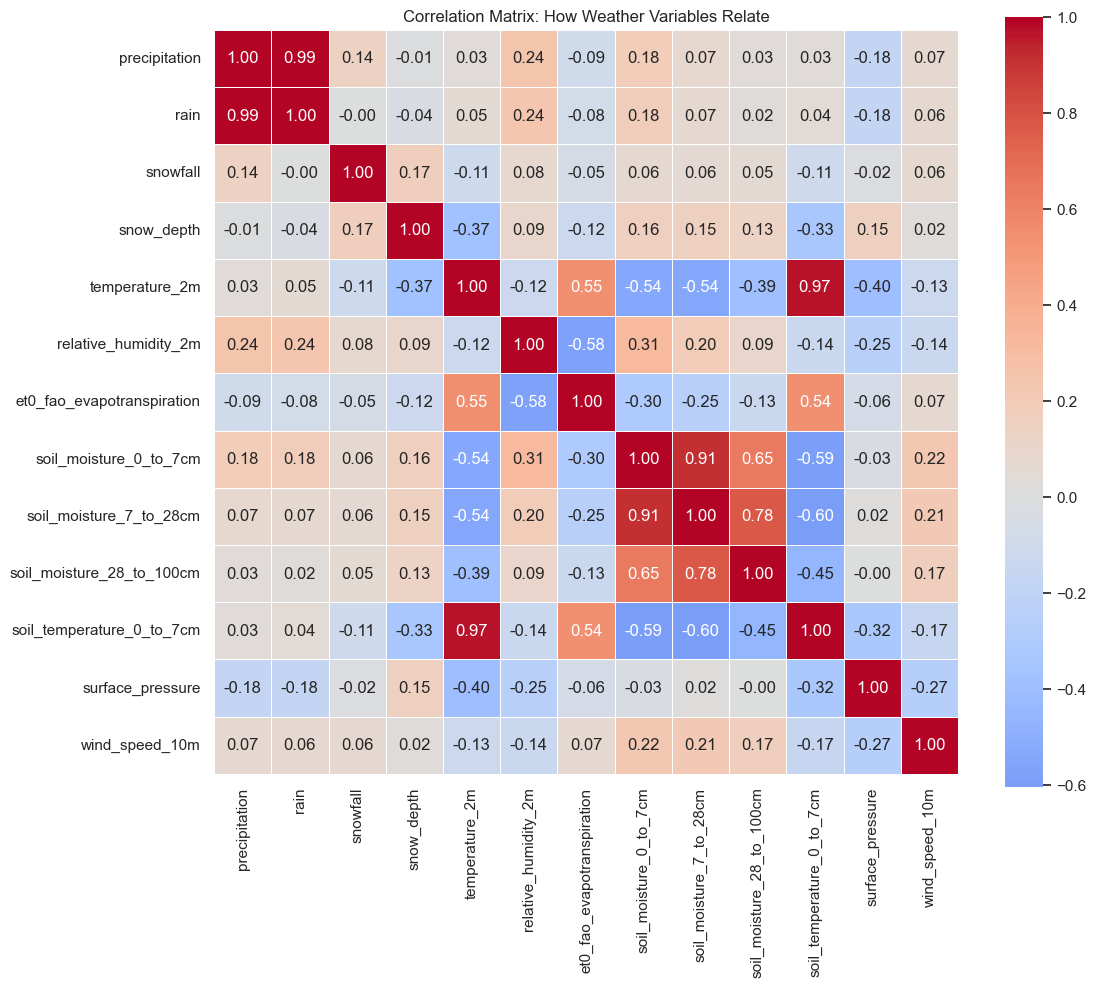

In [15]:
plt.figure(figsize=(12, 10))

# Calculate correlation (excluding the datetime column)
corr_matrix = weather_df.drop(columns=['datetime']).corr()

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,     # Show the numbers
    fmt=".2f",      # 2 decimal places
    cmap="coolwarm",# Blue = Negative, Red = Positive
    center=0,       # White = No correlation
    square=True,
    linewidths=0.5
)

plt.title('Correlation Matrix: How Weather Variables Relate')
plt.show()

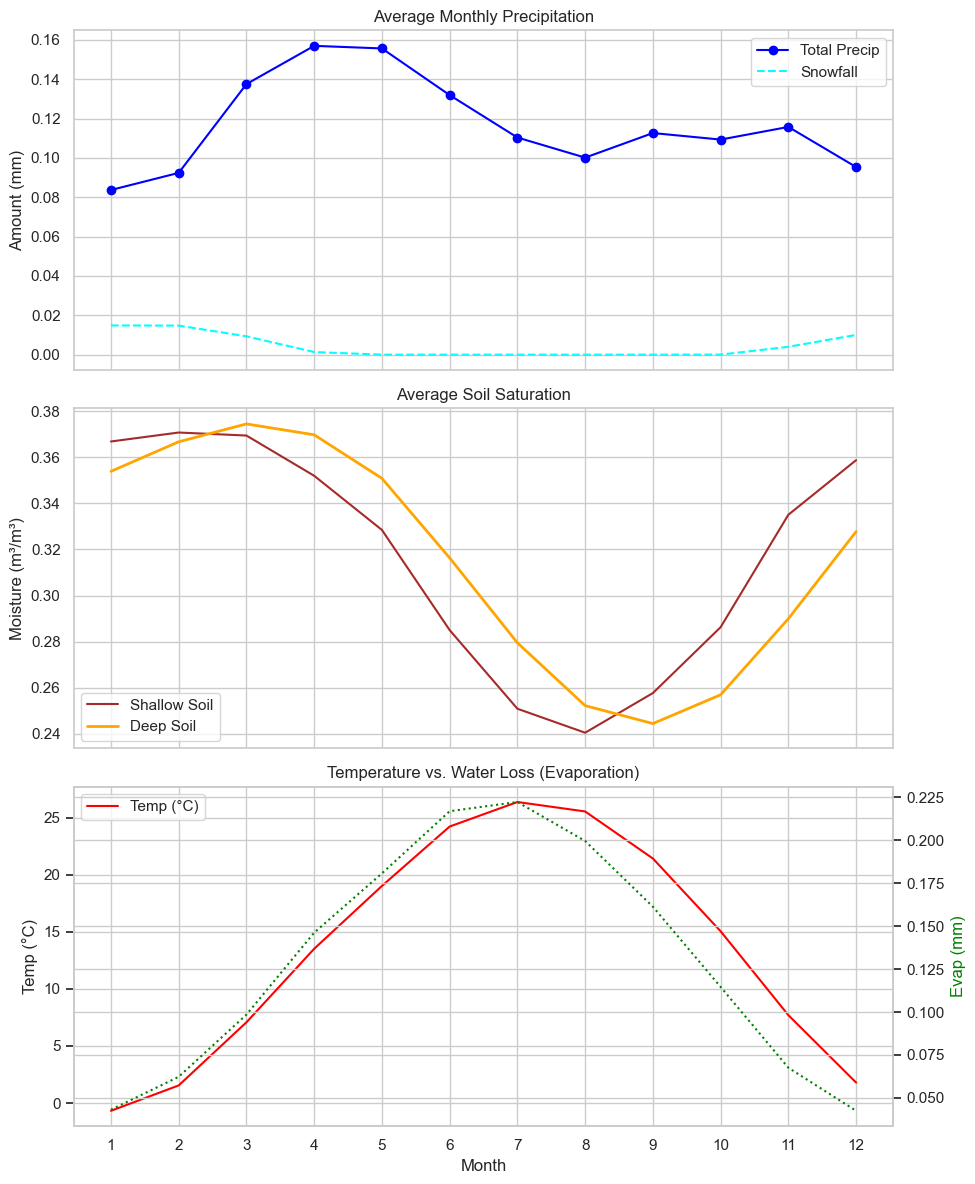

In [16]:
# Create a 'month' column for an annually overview
weather_df['month'] = weather_df['datetime'].dt.month

# Calculate the average for each month across all years
monthly_avg = weather_df.groupby('month').mean(numeric_only=True)

# Plotting specific impactful variables
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot 1: Water Input (Rain/Snow)
axes[0].plot(monthly_avg.index, monthly_avg['precipitation'], label='Total Precip', color='blue', marker='o')
axes[0].plot(monthly_avg.index, monthly_avg['snowfall'], label='Snowfall', color='cyan', linestyle='--')
axes[0].set_ylabel('Amount (mm)')
axes[0].set_title('Average Monthly Precipitation')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Ground State (Soil Moisture)
# Deep soil vs Shallow soil
axes[1].plot(monthly_avg.index, monthly_avg['soil_moisture_0_to_7cm'], label='Shallow Soil', color='brown')
axes[1].plot(monthly_avg.index, monthly_avg['soil_moisture_28_to_100cm'], label='Deep Soil', color='orange', linewidth=2)
axes[1].set_ylabel('Moisture (m³/m³)')
axes[1].set_title('Average Soil Saturation')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Temperature & Evaporation
axes[2].plot(monthly_avg.index, monthly_avg['temperature_2m'], label='Temp (°C)', color='red')
axes[2].set_ylabel('Temp (°C)')
# Create a twin axis for Evaporation
ax2_twin = axes[2].twinx()
ax2_twin.plot(monthly_avg.index, monthly_avg['et0_fao_evapotranspiration'], label='Evaporation', color='green', linestyle=':')
ax2_twin.set_ylabel('Evap (mm)', color='green')

axes[2].set_title('Temperature vs. Water Loss (Evaporation)')
axes[2].set_xlabel('Month')
axes[2].set_xticks(range(1, 13))
axes[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# --- STEP 1: FIX THE TIMEZONES ---
# We force both columns to be UTC.
# If they are already UTC, this just ensures it.
# If they are naive (no timezone), this assigns UTC to them.

df_louis['time'] = pd.to_datetime(df_louis['time'], utc=True)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], utc=True)

# --- STEP 2: RE-SORT (Crucial for merge_asof) ---
df_louis = df_louis.sort_values('time')
weather_df = weather_df.sort_values('datetime')

# --- STEP 3: MERGE ---
# Now this should work without the MergeError
merged_df = pd.merge_asof(
    df_louis,
    weather_df,
    left_on='time',
    right_on='datetime',
    direction='nearest',
    tolerance=pd.Timedelta('1h') # Match if within 1 hour
)

# --- STEP 4: VERIFY ---
print("Merge successful!")
display(merged_df[['time', 'value', 'precipitation']].head())

Merge successful!


,time,value,precipitation
0,1933-03-16 06:00:00+00:00,7.82,NaN
1,1933-03-22 06:00:00+00:00,7.90,NaN
2,1933-03-29 06:00:00+00:00,10.62,NaN
3,1933-04-05 06:00:00+00:00,18.45,NaN
4,1933-04-12 06:00:00+00:00,21.04,NaN


Plotting data from 2020-09-08 to 2025-09-08


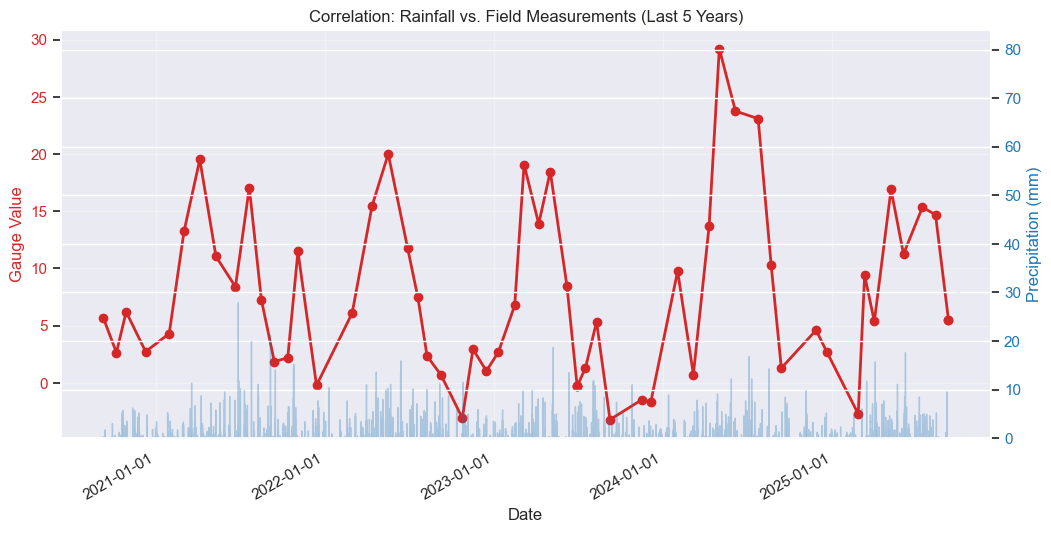

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- CHANGE 1: DEFINE THE 5-YEAR WINDOW FOR MORE UNDERSTNADABLE VISUALIZATION---
# We take the latest date in your data and subtract 5 years using DateOffset
end_t = df_louis['time'].max()
start_t = end_t - pd.DateOffset(years=5)

print(f"Plotting data from {start_t.date()} to {end_t.date()}")

# --- CHANGE 2: SLICE *BOTH* DATASETS ---
# Filter Weather Data
weather_subset = weather_df[
    (weather_df['datetime'] >= start_t) &
    (weather_df['datetime'] <= end_t)
]

# Filter Measurement Data (CRITICAL: You must filter this too!)
merged_subset = merged_df[
    (merged_df['time'] >= start_t) &
    (merged_df['time'] <= end_t)
]

# --- PLOT ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary Axis: Field Measurements (Use merged_subset now)
color_gauge = 'tab:red'
ax1.plot(
    merged_subset['time'],
    merged_subset['value'],
    color=color_gauge,
    marker='o',
    linestyle='-',
    linewidth=2,
    label='Field Measurement'
)

ax1.set_xlabel('Date')
ax1.set_ylabel('Gauge Value', color=color_gauge, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_gauge)
ax1.grid(True, alpha=0.3)

# Secondary Axis: Rainfall
ax2 = ax1.twinx()
color_rain = 'tab:blue'

ax2.fill_between(
    weather_subset['datetime'],
    0,
    weather_subset['precipitation'],
    color=color_rain,
    alpha=0.3,
    step='mid',
    label='Precipitation'
)

ax2.set_ylabel('Precipitation (mm)', color=color_rain, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_rain)
ax2.set_ylim(0, weather_subset['precipitation'].max() * 3)

# Format X-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Correlation: Rainfall vs. Field Measurements (Last 5 Years)')
plt.show()

**Finding: Seems somehow related but not soo much, because massive river is only little affected by the local rain - you can see recurring cycles over the years.**

In [22]:
# 1. Load the file (Make sure 'USGS_Data.txt' matches your saved filename)
usgs_df = pd.read_csv(
    '../USGS_Data.txt',
    sep='\t',
    comment='#',
    header=0,
    dtype=str  # Read as text first to handle the messy headers safely
)

# 2. Drop the "junk" row (the one with '5s', '15s' etc.)
usgs_df = usgs_df.drop(0)

# 3. Rename columns to be friendly for our model
# '77444_00065' is the specific code for Gauge Height at this site.
# If your column name is different, check print(usgs_df.columns)
usgs_df = usgs_df.rename(columns={
    'datetime': 'time',
    '77444_00065': 'usgs_level'
})

# 4. Convert columns to correct types
usgs_df['time'] = pd.to_datetime(usgs_df['time'], utc=True)
usgs_df['usgs_level'] = pd.to_numeric(usgs_df['usgs_level'], errors='coerce')

print("usgs_df reloaded successfully.")
display(usgs_df.head())

usgs_df reloaded successfully.


,agency_cd,site_no,time,tz_cd,usgs_level,77444_00065_cd
1,USGS,07010000,2001-10-01 02:00:00+00:00,CDT,6.11,A
2,USGS,07010000,2001-10-01 03:00:00+00:00,CDT,6.08,A
3,USGS,07010000,2001-10-01 04:00:00+00:00,CDT,6.13,A
4,USGS,07010000,2001-10-01 05:00:00+00:00,CDT,6.15,A
5,USGS,07010000,2001-10-01 06:00:00+00:00,CDT,6.10,A


### Model Training

Start with XGBoost
Why? Because it is much easier to debug. You can throw all your weather variables at it and immediately see which variables are relevant for the prediction. This confirms your data is good.

If we need that extra 5-10% accuracy, we can move to LSTM, but it's more time intenstive to train

In [24]:
import pandas as pd

# 1. Convert time to UTC datetime
usgs_df['time'] = pd.to_datetime(usgs_df['time'], utc=True)

# 2. Force the gauge level to be numeric
# 'errors=coerce' turns any non-number text (like "Eqp") into NaN so it doesn't crash
usgs_df['usgs_level'] = pd.to_numeric(usgs_df['usgs_level'], errors='coerce')

# 3. Resample to Hourly
# We use 'numeric_only=True' to strictly ignore the text columns causing the error
usgs_hourly = usgs_df.set_index('time').resample('h').mean(numeric_only=True).reset_index()


# --- MERGE WITH WEATHER ---

# 4. Prepare Weather Data
weather_hourly = weather_df.copy()
if 'datetime' in weather_hourly.columns:
    weather_hourly = weather_hourly.rename(columns={'datetime': 'time'})

# Ensure weather time is also UTC
weather_hourly['time'] = pd.to_datetime(weather_hourly['time'], utc=True)

# 5. Merge
# 'inner' join keeps only times where we have BOTH gauge and weather data
full_data = pd.merge(usgs_hourly, weather_hourly, on='time', how='inner')
full_data = full_data.sort_values('time')

print(f"Data merged successfully! Total hourly records: {len(full_data)}")
display(full_data.head())

Data merged successfully! Total hourly records: 209854


,time,usgs_level,precipitation,rain,snowfall,snow_depth,temperature_2m,relative_humidity_2m,et0_fao_evapotranspiration,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_temperature_0_to_7cm,surface_pressure,wind_speed_10m,month
0,2001-10-01 02:00:00+00:00,6.11,0.0,0.0,0.0,0.0,11.4,90,0.0,0.206,0.251,0.251,13.4,1008.3,7.5,10
1,2001-10-01 03:00:00+00:00,6.08,0.0,0.0,0.0,0.0,11.1,91,0.0,0.206,0.251,0.251,13.0,1007.9,7.6,10
2,2001-10-01 04:00:00+00:00,6.13,0.0,0.0,0.0,0.0,11.0,91,0.0,0.206,0.251,0.251,12.7,1007.9,8.0,10
3,2001-10-01 05:00:00+00:00,6.15,0.0,0.0,0.0,0.0,10.2,94,0.0,0.207,0.251,0.251,12.4,1008.1,6.2,10
4,2001-10-01 06:00:00+00:00,6.10,0.0,0.0,0.0,0.0,9.6,95,0.0,0.207,0.251,0.251,12.1,1008.0,6.6,10


In [26]:
def create_features(df):
    df = df.copy()

    # --- A. LAG FEATURES (The "Memory") ---
    # How much did it rain...
    df['rain_lag_1h'] = df['precipitation'].shift(1)   # 1 hour ago
    df['rain_lag_6h'] = df['precipitation'].shift(6)   # 6 hours ago
    df['rain_lag_24h'] = df['precipitation'].shift(24) # 1 day ago
    df['rain_sum_3d'] = df['precipitation'].rolling(window=72).sum() # Accumulation over 3 days

    # Soil Memory (Deep soil changes slowly, so we take larger lags)
    if 'soil_moisture_28_to_100cm' in df.columns:
        df['soil_deep_lag_24h'] = df['soil_moisture_28_to_100cm'].shift(24)

    # --- B. AUTOREGRESSION (The "Inertia") ---
    # The river level 1 hour ago is usually the best predictor of the level now.
    # WARNING: Only use this if you are doing "1-step ahead" forecasting.
    df['level_lag_1h'] = df['usgs_level'].shift(1)
    df['level_lag_24h'] = df['usgs_level'].shift(24)

    # --- C. TIME FEATURES (Seasonality) ---
    df['hour'] = df['time'].dt.hour
    df['month'] = df['time'].dt.month
    df['day_of_year'] = df['time'].dt.dayofyear

    # Drop rows with NaN (created by the shifting)
    df = df.dropna()

    return df

# Apply the features
ml_data = create_features(full_data)
print("Features created.")

Features created.


In [27]:
# Select features (X) and target (y)
# Exclude the 'time' column and the target itself from X
target = 'usgs_level'
features = [col for col in ml_data.columns if col not in ['time', target, 'agency_cd', 'site_no', 'tz_cd']]

# Define Split Point (e.g., Train on everything up to the last 2 years, Test on last 2 years)
split_date = ml_data['time'].max() - pd.DateOffset(years=2)

train = ml_data[ml_data['time'] < split_date]
test = ml_data[ml_data['time'] >= split_date]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print(f"Training on {len(X_train)} hours.")
print(f"Testing on {len(X_test)} hours (last 2 years).")

Training on 184966 hours.
Testing on 17319 hours (last 2 years).


In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = XGBRegressor(
    n_estimators=1000,      # Maximum number of trees
    learning_rate=0.01,     # Slow learning is better for accuracy
    max_depth=5,            # Depth of trees (prevent overfitting)
    early_stopping_rounds=50, # Stop if validation score doesn't improve for 50 rounds
    random_state=42
)

# Fit the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100 # Print progress every 100 trees
)

[0]	validation_0-rmse:9.93734	validation_1-rmse:10.01994
[100]	validation_0-rmse:3.64654	validation_1-rmse:3.67357
[200]	validation_0-rmse:1.34299	validation_1-rmse:1.34870
[300]	validation_0-rmse:0.50612	validation_1-rmse:0.49941
[400]	validation_0-rmse:0.21522	validation_1-rmse:0.19715
[500]	validation_0-rmse:0.12913	validation_1-rmse:0.10384
[600]	validation_0-rmse:0.10982	validation_1-rmse:0.08323
[700]	validation_0-rmse:0.10473	validation_1-rmse:0.07969
[800]	validation_0-rmse:0.10145	validation_1-rmse:0.07845
[900]	validation_0-rmse:0.09860	validation_1-rmse:0.07811
[999]	validation_0-rmse:0.09703	validation_1-rmse:0.07761


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


Root Mean Squared Error: 0.08 feet


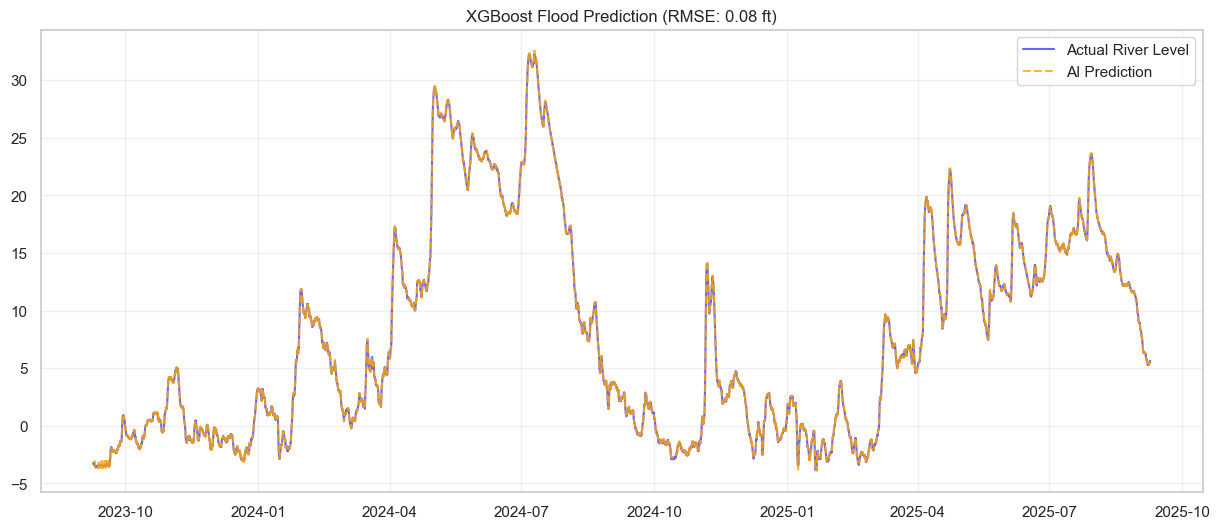

<Figure size 1000x800 with 0 Axes>

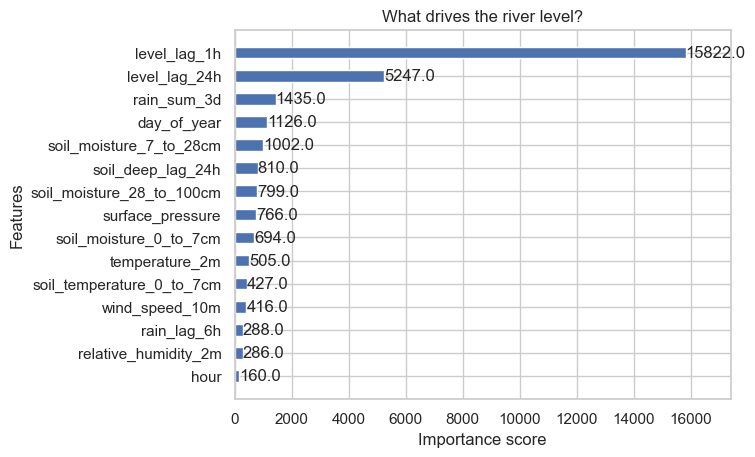

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Make Predictions
predictions = model.predict(X_test)

# 2. Add predictions back to the test dataframe for plotting
test_results = test.copy()
test_results['prediction'] = predictions

# 3. Calculate Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse:.2f} feet")

# 4. PLOT: Actual vs Predicted
plt.figure(figsize=(15, 6))
plt.plot(test_results['time'], test_results['usgs_level'], label='Actual River Level', color='blue', alpha=0.6)
plt.plot(test_results['time'], test_results['prediction'], label='AI Prediction', color='orange', alpha=0.8, linestyle='--')
plt.title(f'XGBoost Flood Prediction (RMSE: {rmse:.2f} ft)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. PLOT: Feature Importance (What caused the flood?)
from xgboost import plot_importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=15, height=0.5)
plt.title("What drives the river level?")
plt.show()

**Finding: When using the hourly water level as a feature, it's very simple to predict the water level in 1 hour, because it stays almost the same. That's why the results here are way too good, with less than 1ft deviation from the true value.**

In [31]:
# 1. Define 'Hard Mode' Features (Exclude the river lags to focus solely on weather data)
# We keep rain, soil, month, etc., but remove 'level_lag_1h' and 'level_lag_24h'
features_hard = [col for col in features if 'level_lag' not in col]

print(f"Hard Mode Features: {features_hard}")

# 2. Retrain on the same split
X_train_hard = train[features_hard]
X_test_hard = test[features_hard]

model_hard = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50,
    random_state=42
)

print("Training Hard Mode Model (Physics Only)...")
model_hard.fit(
    X_train_hard, y_train,
    eval_set=[(X_train_hard, y_train), (X_test_hard, y_test)],
    verbose=100
)

# 3. Check Results
preds_hard = model_hard.predict(X_test_hard)
rmse_hard = np.sqrt(mean_squared_error(y_test, preds_hard))
print(f"\nHard Mode RMSE: {rmse_hard:.2f} feet")

Hard Mode Features: ['precipitation', 'rain', 'snowfall', 'snow_depth', 'temperature_2m', 'relative_humidity_2m', 'et0_fao_evapotranspiration', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm', 'soil_temperature_0_to_7cm', 'surface_pressure', 'wind_speed_10m', 'month', 'rain_lag_1h', 'rain_lag_6h', 'rain_lag_24h', 'rain_sum_3d', 'soil_deep_lag_24h', 'hour', 'day_of_year']
Training Hard Mode Model (Physics Only)...
[0]	validation_0-rmse:9.98476	validation_1-rmse:10.07402
[100]	validation_0-rmse:7.13446	validation_1-rmse:8.02291
[200]	validation_0-rmse:6.37241	validation_1-rmse:7.80199
[300]	validation_0-rmse:6.13329	validation_1-rmse:7.73766
[384]	validation_0-rmse:6.00505	validation_1-rmse:7.71314

Hard Mode RMSE: 7.70 feet


**Finding: When using the hard mode (only weather data), it fails because the local weather isn't sufficient to predict the water level (Mississipi is a massive river connected to many other cities and their weather over their last weeks (e.g. Minnesota, Wisconsin, Dakota).**

Training 24-Hour Forecast Model...
[0]	validation_0-rmse:9.93907	validation_1-rmse:10.02217
[100]	validation_0-rmse:3.82820	validation_1-rmse:3.85207
[200]	validation_0-rmse:1.77447	validation_1-rmse:1.78218
[300]	validation_0-rmse:1.21397	validation_1-rmse:1.23325
[400]	validation_0-rmse:1.07990	validation_1-rmse:1.12413
[500]	validation_0-rmse:1.03358	validation_1-rmse:1.10033
[600]	validation_0-rmse:1.00756	validation_1-rmse:1.09086
[700]	validation_0-rmse:0.99037	validation_1-rmse:1.08641
[757]	validation_0-rmse:0.98288	validation_1-rmse:1.08748

24-Hour Forecast RMSE: 1.09 feet


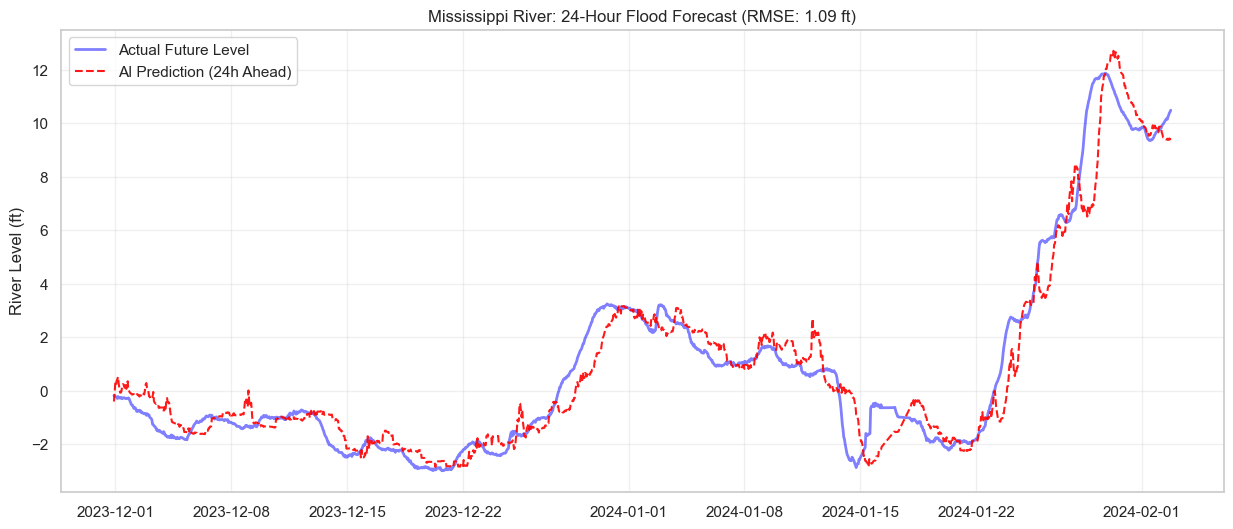

In [32]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- 1. SETUP THE FORECAST TARGET ---
HORIZON = 24  # We want to predict the level 24 hours from now

# Create a target column shifted by -24
# (The value at Row 0 will be the River Level from Row 24)
ml_data['target_future'] = ml_data['usgs_level'].shift(-HORIZON)

# Remove the empty rows at the end (where we don't know the future yet)
ml_data_future = ml_data.dropna(subset=['target_future'])

# --- 2. TRAIN/TEST SPLIT ---
# We split by time again
split_date = ml_data_future['time'].max() - pd.DateOffset(years=2)

train_f = ml_data_future[ml_data_future['time'] < split_date]
test_f = ml_data_future[ml_data_future['time'] >= split_date]

# --- CRITICAL STEP: SELECT FEATURES ---
# We MUST use the original 'features' list that includes 'level_lag_1h' / 'level_lag_24h'
# This gives the model the "Current Location" of the river.
X_train_f = train_f[features]
y_train_f = train_f['target_future']

X_test_f = test_f[features]
y_test_f = test_f['target_future']

# --- 3. TRAIN THE FORECAST MODEL ---
model_future = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50,
    random_state=42
)

print(f"Training {HORIZON}-Hour Forecast Model...")
model_future.fit(
    X_train_f, y_train_f,
    eval_set=[(X_train_f, y_train_f), (X_test_f, y_test_f)],
    verbose=100
)

# --- 4. VISUALIZE THE FUTURE ---
preds_future = model_future.predict(X_test_f)
rmse_future = np.sqrt(mean_squared_error(y_test_f, preds_future))

print(f"\n24-Hour Forecast RMSE: {rmse_future:.2f} feet")

# Plotting a snippet to see the "Lead Time"
plot_df = test_f.copy()
plot_df['prediction'] = preds_future

plt.figure(figsize=(15, 6))
# Plot specific window to see the detail (e.g., a 2-month window)
# Adjust .iloc numbers to scroll through time
subset = plot_df.iloc[2000:3500]

plt.plot(subset['time'], subset['target_future'], label='Actual Future Level', color='blue', alpha=0.5, linewidth=2)
plt.plot(subset['time'], subset['prediction'], label='AI Prediction (24h Ahead)', color='red', linestyle='--', alpha=0.9)

plt.title(f'Mississippi River: 24-Hour Flood Forecast (RMSE: {rmse_future:.2f} ft)')
plt.ylabel('River Level (ft)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Finding: Hybrid approach: combine the river's current momentum (using recent gauge readings) with external weather drivers (rain and soil moisture) inside an XGBoost model to predict how the water level will change over the next 24 hours.**
-> Idea: Include the river levels from further away rivers

In [35]:
import pandas as pd
import requests
import io

def get_usgs_daily(site_no, start_date, end_date, site_name):
    """
    Downloads Daily Mean Gage Height from USGS.
    """
    url = (
        "https://waterdata.usgs.gov/nwis/dv"
        "?cb_00065=on"          # Parameter 00065 = Gage Height
        "&format=rdb"           # Tab-delimited format
        f"&site_no={site_no}"
        "&referred_module=sw"
        f"&begin_date={start_date}"
        f"&end_date={end_date}"
    )

    print(f"Downloading {site_name} (Site {site_no})...")
    response = requests.get(url)

    # 1. Parse the text, skipping comments (#)
    data_str = response.text
    lines = [line for line in data_str.split('\n') if not line.startswith('#')]
    cleaned_data = '\n'.join(lines)

    # 2. Load into Pandas
    # The first row of data is headers, the second is the "5s 15s" junk row
    df = pd.read_csv(io.StringIO(cleaned_data), sep='\t', header=0, dtype=str)

    # 3. Drop the junk row (usually row 0)
    df = df.drop(0)

    # 4. Clean Columns
    # Identify the value column (it ends in _00065 usually, or similar)
    # We look for the column that contains the gage height
    val_col = [c for c in df.columns if c.endswith('00065_00003')] # 00003 = Mean
    if not val_col:
        # Fallback if specific code isn't found, try the first generic one
        val_col = [c for c in df.columns if '00065' in c and '_cd' not in c]

    col_name = val_col[0]

    # Rename and Convert
    df = df.rename(columns={'datetime': 'time', col_name: f'{site_name}_level'})
    df['time'] = pd.to_datetime(df['time'], utc=True)
    df[f'{site_name}_level'] = pd.to_numeric(df[f'{site_name}_level'], errors='coerce')

    # Return only time and the level
    return df[['time', f'{site_name}_level']]

# --- EXECUTION ---

# Define range based on your existing data
start = ml_data['time'].min().strftime('%Y-%m-%d')
end = ml_data['time'].max().strftime('%Y-%m-%d')

# Fetch Upstream Data
grafton_df = get_usgs_daily('05587450', start, end, 'grafton')
hermann_df = get_usgs_daily('06934500', start, end, 'hermann')

print("Download Complete.")
display(grafton_df.head())

Download Complete.


,time,grafton_level
1,2001-10-04 00:00:00+00:00,15.30
2,2001-10-05 00:00:00+00:00,15.44
3,2001-10-06 00:00:00+00:00,NaN
4,2001-10-07 00:00:00+00:00,NaN
5,2001-10-08 00:00:00+00:00,NaN


In [36]:
# 1. Prepare Main Data (Ensure it's sorted)
ml_data = ml_data.sort_values('time')

# 2. Merge Grafton
# We merge on 'date' essentially. Since ml_data is hourly, we can use merge_asof
# with a tolerance of 24 hours to find the nearest daily reading.
ml_data = pd.merge_asof(
    ml_data,
    grafton_df.sort_values('time'),
    on='time',
    direction='backward', # Look at the PAST reading (don't cheat with future data)
    tolerance=pd.Timedelta('48h')
)

# 3. Merge Hermann
ml_data = pd.merge_asof(
    ml_data,
    hermann_df.sort_values('time'),
    on='time',
    direction='backward',
    tolerance=pd.Timedelta('48h')
)

# 4. Create Lag Features for these new rivers
# Knowing the river level RIGHT NOW is good.
# Knowing it 24h ago is even better for trend detection.
ml_data['grafton_lag_24h'] = ml_data['grafton_level'].shift(24)
ml_data['hermann_lag_24h'] = ml_data['hermann_level'].shift(24)

# Drop any new NaNs created by the merge
ml_data_upstream = ml_data.dropna(subset=['grafton_level', 'hermann_level'])

print(f"New Dataset Size: {len(ml_data_upstream)} hours")
print("New Features Added: grafton_level, hermann_level")

New Dataset Size: 198744 hours
New Features Added: grafton_level, hermann_level


Training 24-Hour Forecast Model...
[0]	validation_0-rmse:9.93906	validation_1-rmse:10.02213
[100]	validation_0-rmse:3.82533	validation_1-rmse:3.84648
[200]	validation_0-rmse:1.74316	validation_1-rmse:1.74279
[300]	validation_0-rmse:1.13220	validation_1-rmse:1.14944
[400]	validation_0-rmse:0.95501	validation_1-rmse:0.99768
[500]	validation_0-rmse:0.88593	validation_1-rmse:0.94567
[600]	validation_0-rmse:0.84803	validation_1-rmse:0.92248
[700]	validation_0-rmse:0.82378	validation_1-rmse:0.90855
[800]	validation_0-rmse:0.80431	validation_1-rmse:0.89819
[900]	validation_0-rmse:0.78648	validation_1-rmse:0.89138
[999]	validation_0-rmse:0.77305	validation_1-rmse:0.88852

24-Hour Forecast RMSE: 0.89 feet


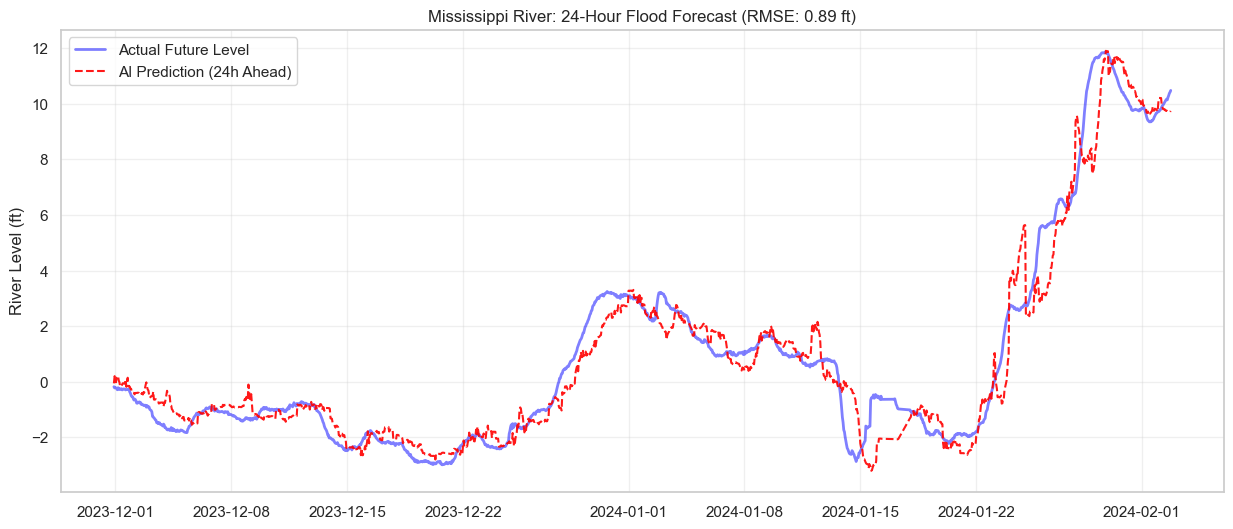

In [37]:
# Add new features to your list
features_advanced = features + ['grafton_level', 'hermann_level', 'grafton_lag_24h', 'hermann_lag_24h']

# Re-run your Train/Test split and .fit() code using 'features_advanced'

# --- 1. SETUP THE FORECAST TARGET ---
HORIZON = 24  # We want to predict the level 24 hours from now

# Create a target column shifted by -24
# (The value at Row 0 will be the River Level from Row 24)
ml_data['target_future'] = ml_data['usgs_level'].shift(-HORIZON)

# Remove the empty rows at the end (where we don't know the future yet)
ml_data_future = ml_data.dropna(subset=['target_future'])

# --- 2. TRAIN/TEST SPLIT ---
# We split by time again
split_date = ml_data_future['time'].max() - pd.DateOffset(years=2)

train_f = ml_data_future[ml_data_future['time'] < split_date]
test_f = ml_data_future[ml_data_future['time'] >= split_date]

# --- CRITICAL STEP: SELECT FEATURES ---
# We MUST use the original 'features' list that includes 'level_lag_1h' / 'level_lag_24h'
# This gives the model the "Current Location" of the river.
X_train_f = train_f[features_advanced]
y_train_f = train_f['target_future']

X_test_f = test_f[features_advanced]
y_test_f = test_f['target_future']

# --- 3. TRAIN THE FORECAST MODEL ---
model_future = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50,
    random_state=42
)

print(f"Training {HORIZON}-Hour Forecast Model...")
model_future.fit(
    X_train_f, y_train_f,
    eval_set=[(X_train_f, y_train_f), (X_test_f, y_test_f)],
    verbose=100
)

# --- 4. VISUALIZE THE FUTURE ---
preds_future = model_future.predict(X_test_f)
rmse_future = np.sqrt(mean_squared_error(y_test_f, preds_future))

print(f"\n24-Hour Forecast RMSE: {rmse_future:.2f} feet")

# Plotting a snippet to see the "Lead Time"
plot_df = test_f.copy()
plot_df['prediction'] = preds_future

plt.figure(figsize=(15, 6))
# Plot specific window to see the detail (e.g., a 2-month window)
# Adjust .iloc numbers to scroll through time
subset = plot_df.iloc[2000:3500]

plt.plot(subset['time'], subset['target_future'], label='Actual Future Level', color='blue', alpha=0.5, linewidth=2)
plt.plot(subset['time'], subset['prediction'], label='AI Prediction (24h Ahead)', color='red', linestyle='--', alpha=0.9)

plt.title(f'Mississippi River: 24-Hour Flood Forecast (RMSE: {rmse_future:.2f} ft)')
plt.ylabel('River Level (ft)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Findings (2)
* Integrating the data of other sensors improved the model's accuracy by roughly 17-18%, which is a significant change. Therefore, the previous blind spot was fixed. Here's an overview about the most influential factors:

<Figure size 1200x1000 with 0 Axes>

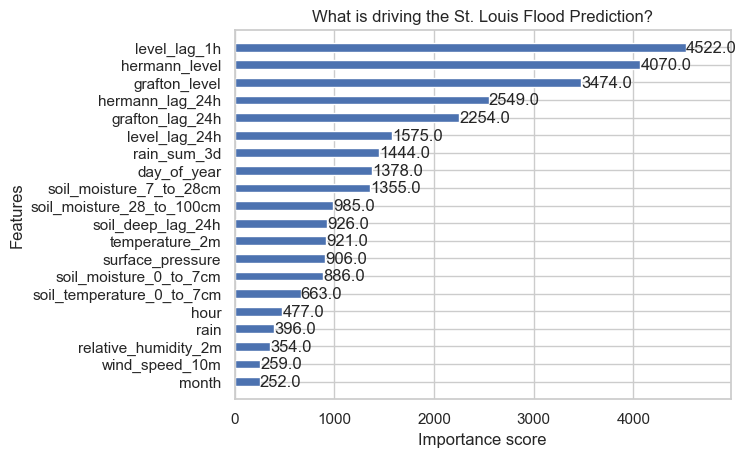

In [38]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
# Plot the top 20 most important features
plot_importance(model_future, max_num_features=20, height=0.5, importance_type='weight')
plt.title("What is driving the St. Louis Flood Prediction?")
plt.show()

Dummy Model (Persistence) RMSE: 1.20 feet
Your AI Model (XGBoost) RMSE:   0.89 feet

Your AI beat the Dummy by: 0.32 feet (26.2%)
VERDICT: REAL PREDICTION. Your model is learning physics, not just copying the last value.


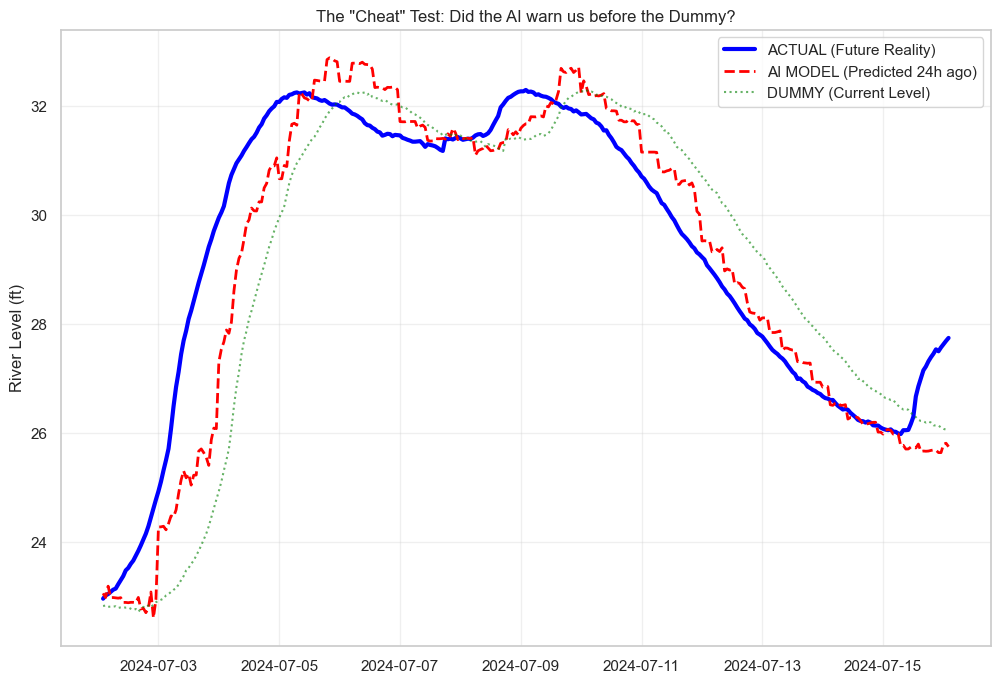

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# X_test_f only has the specific features the model uses.
# test_f has the original raw data, including the current 'usgs_level'.

# 1. The "Dummy" Prediction (Persistence)
# "I predict the level in 24 hours will be exactly what it is right now."
dummy_preds = test_f['usgs_level']

# 2. Calculate the Dummy's Error
dummy_rmse = np.sqrt(mean_squared_error(y_test_f, dummy_preds))

# 3. Compare with your AI
print(f"Dummy Model (Persistence) RMSE: {dummy_rmse:.2f} feet")
print(f"Your AI Model (XGBoost) RMSE:   {rmse_future:.2f} feet")

improvement = dummy_rmse - rmse_future
pct_improvement = (improvement / dummy_rmse) * 100

print(f"\nYour AI beat the Dummy by: {improvement:.2f} feet ({pct_improvement:.1f}%)")

if improvement > 0.1:
    print("VERDICT: REAL PREDICTION. Your model is learning physics, not just copying the last value.")
else:
    print("VERDICT: CHEATING. Your model is just a fancy way of saying 'no change'.")

# --- VISUALIZATION ---
verify_df = test_f.copy()
verify_df['AI_Prediction'] = preds_future
verify_df['Dummy_Prediction'] = dummy_preds
verify_df['Actual_Future'] = y_test_f

# Zoom in on the highest peak to see the timing difference
peak_date = verify_df.sort_values('Actual_Future', ascending=False).iloc[0]['time']
start_zoom = peak_date - pd.Timedelta(days=7)
end_zoom = peak_date + pd.Timedelta(days=7)
zoom_df = verify_df[(verify_df['time'] >= start_zoom) & (verify_df['time'] <= end_zoom)]

plt.figure(figsize=(12, 8))
plt.plot(zoom_df['time'], zoom_df['Actual_Future'], color='blue', linewidth=3, label='ACTUAL (Future Reality)')
plt.plot(zoom_df['time'], zoom_df['AI_Prediction'], color='red', linestyle='--', linewidth=2, label='AI MODEL (Predicted 24h ago)')
plt.plot(zoom_df['time'], zoom_df['Dummy_Prediction'], color='green', linestyle=':', alpha=0.6, label='DUMMY (Current Level)')
plt.title('The "Cheat" Test: Did the AI warn us before the Dummy?')
plt.ylabel('River Level (ft)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
import os

# 1. Save the Weather History (Open-Meteo Data)
if 'weather_df' in locals():
    weather_df.to_csv('weather_history_st_louis.csv', index=False)
    print("Saved: weather_history_st_louis.csv")

# 2. Save the Upstream River Data (Grafton - Mississippi)
if 'grafton_df' in locals():
    grafton_df.to_csv('river_upstream_grafton.csv', index=False)
    print("Saved: river_upstream_grafton.csv")

# 3. Save the Upstream River Data (Hermann - Missouri)
if 'hermann_df' in locals():
    hermann_df.to_csv('river_upstream_hermann.csv', index=False)
    print("Saved: river_upstream_hermann.csv")

# 4. Save your Target Site Data (St. Louis)
if 'usgs_df' in locals():
    usgs_df.to_csv('river_target_st_louis.csv', index=False)
    print("Saved: river_target_st_louis.csv")

print(f"\nAll files saved to: {os.getcwd()}")

Saved: weather_history_st_louis.csv
Saved: river_upstream_grafton.csv
Saved: river_upstream_hermann.csv
Saved: river_target_st_louis.csv

All files saved to: C:\Users\sabri\PyCharmMiscProject


In [47]:
weather_df.to_csv('weather_history_st_louis.csv.gz', index=False, compression='gzip')
print("Saved compressed file: weather_history_st_louis.csv.gz")

Saved compressed file: weather_history_st_louis.csv.gz
